## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

In [4]:
# Set csv path
mouse_metadata_path="data/Mouse_metadata.csv"
study_results_path="data/Study_results.csv"

# Read csv 
mouse_metadata=pd.read_csv(mouse_metadata_path)
study_results=pd.read_csv(study_results_path)

#### Brief assessment of each dataset

In [5]:
# mouse_metadata
# mouse_metadata.head()
#mouse_metadata.count()

In [6]:
# study_results
# study_results.head()
#study_results.count()

#### Combine and Display Merged Dataset

In [7]:
# Combine the data into a single dataset 
combined_df=pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

In [8]:
# Display the data table for preview
#combined_df
combined_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

#### Check Number of Mice

In [9]:
# Check Number of Mice
mouse_ids=combined_df["Mouse ID"].value_counts()
dirty_mouse_count=len(mouse_ids)
dirty_mouse_count

249

### Get Duplicate Mice by ID

In [10]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
myfilter=combined_df.duplicated(subset=["Mouse ID", "Timepoint"])
filter_df=combined_df.loc[myfilter,"Mouse ID"]
filter_df

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

### Create Cleaned DataFrame by Dropping Duplicate

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
new=combined_df.loc[:, 'Mouse ID']!="g989"
final_df=combined_df.loc[new,:]
final_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

### Find and Show Number of Mice in Cleaned DataFrame

In [36]:
cleaned_mouse=len(final_df['Mouse ID'].unique())
cleaned_count_df=pd.DataFrame({'Numer of Mice': [cleaned_mouse]})
cleaned_count_df

Numer of Mice
0            248

## Summary Statistics
Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [38]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary dataframe.
stats_df=final_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem'])
stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

## Bar and Pie Charts

In [ ]:
# for easy reference of df headers - delete before submiting
final_df.head(1)

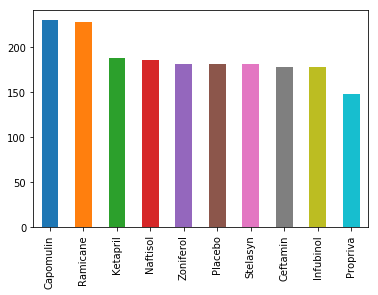

In [37]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
number=final_df["Drug Regimen"].value_counts()
number.plot(kind='bar')

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#x_axis=np.arange(number)
#plt.bar(x_axis, )

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four=['Capomulin', 'Ramicane','Infubinol','Ceftamin']

four_regimens=final_df[final_df['Drug Regimen'].isin(four)]
four_regimens

# Start by getting the last (greatest) timepoint for each mouse
max_timept=four_regimens.groupby('Mouse ID')['Timepoint'].max()
max_timept

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_tumor_vol=pd.merge(max_time_df, four_regimens, on=('Mouse ID', 'Timepoint'))
four_tumor_vol

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
5      a520         45     Ramicane    Male          13          21   
6      a577         30    Infubinol  Female           6          25   
7      a644         45     Ramicane  Female           7          17   
8      a685         45    Infubinol    Male           8          30   
9      b128         45    Capomulin  Female           9          22   
10     b447          0     Ceftamin    Male           2          30   
11     b487         25     Ceftamin  Female           6          28   
12     b742         45    Capomulin    Male           7          21   
13     b759         30     Ceftamin  Female          12          25   
14     c139         45    Infubinol    Male          11          28   
15     c326          5    Infubinol  Female          18          25   
16     c458         30     Ramicane  Female          23          20   
17     c758         45     Ramicane    Male           9          17   
18     c895         30    Infubinol  Female           7          29   
19     d251         45     Ramicane  Female           8          19   
20     e476         45    Infubinol    Male          23          26   
21     e662         45     Ramicane    Male           8          24   
22     f345         45    Infubinol    Male          23          26   
23     f436         15     Ceftamin  Female           3          25   
24     f966         20    Capomulin    Male          16          17   
25     g288         45    Capomulin    Male           3          19   
26     g316         45    Capomulin  Female          22          22   
27     g791         45     Ramicane    Male          11          16   
28     h531          5     Ceftamin    Male           5          27   
29     i177         45     Ramicane    Male          10          18   
..      ...        ...          ...     ...         ...         ...   
70     s185         45    Capomulin  Female           3          17   
71     s508         45     Ramicane    Male           1          17   
72     s710         45    Capomulin  Female           1          23   
73     t565         45    Capomulin  Female          20          17   
74     t573          0     Ceftamin  Female          15          27   
75     u149         25     Ceftamin    Male          24          29   
76     u153          0     Ceftamin  Female          11          25   
77     u196         45     Ramicane    Male          18          25   
78     u364         45    Capomulin    Male          18          17   
79     v339          5    Infubinol    Male          20          26   
80     v719         20    Infubinol  Female          17          30   
81     v766         15    Infubinol    Male          16          27   
82     v923         45    Capomulin  Female          19          21   
83     w150         10    Capomulin    Male          23          23   
84     w151         45     Ceftamin    Male          24          25   
85     w193         20    Infubinol    Male          22          30   
86     w584         30    Infubinol    Male           3          29   
87     w678          5     Ramicane  Female           5          24   
88     w914         45    Capomulin    Male          24          21   
89     x226          0     Ceftamin    Male          23          28   
90     x401         45    Capomulin  Female          16          15   
91     x581         45     Ceftamin  Female          19          28   
92     x822         45     Ceftamin    Male           3          29   
93     y163         45    Infubinol  Female          17          27   
94     y449         15     

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment_list=['Capomulin', 'Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. avg mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
